<a href="https://colab.research.google.com/github/MuneneMutuma/Stock-Prediction-Regression/blob/main/Regression_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

### Importing Modules

In [92]:
!pip install plotly

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge, Lasso

In [3]:
!wget https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv

--2024-11-07 14:29:51--  https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552108 (539K) [text/plain]
Saving to: ‘NSE_data_all_stocks_2022_jan_to_may.csv’

NSE_data_all_stocks 100%[===================>] 539.17K  --.-KB/s    in 0.06s   

2024-11-07 14:29:51 (8.87 MB/s) - ‘NSE_data_all_stocks_2022_jan_to_may.csv’ saved [552108/552108]



## Load Data

In [4]:
df = pd.read_csv('./NSE_data_all_stocks_2022_jan_to_may.csv')

## Feature Selection

In [5]:
selected_companies = ['SCBK']

df2 = df[['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change']]
df2 = df2[df2['Code'].isin(selected_companies)]
df2 = df2.drop(['Code', 'Name'], axis=1)

## Pre Processing

### date conversion

In [6]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%b-%y')
df2.set_index('Date', inplace=True)

### Check for null values

In [7]:
df2.isnull().sum()

,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Day Price,0
Previous,0
Change,0


### Viewing data

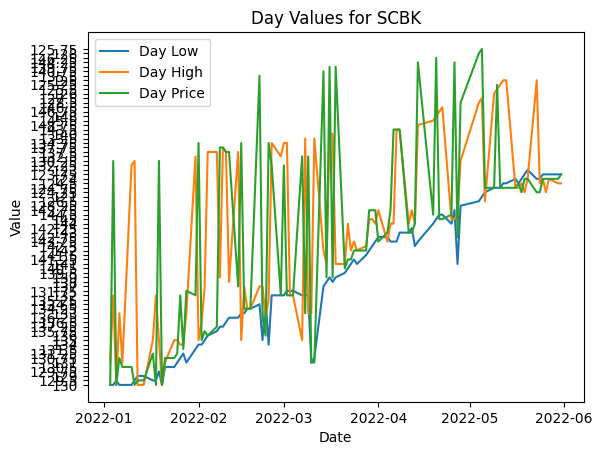

In [8]:
columns = ['Day Low', 'Day High', 'Day Price']
for col in columns:
    plt.plot(df2[col], label=col)
plt.title('Day Values for SCBK')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
features = ['12m High', '12m Low', 'Day Low', 'Day High']
target_variable = 'Day Price'

## Model Training

### Test Train Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target_variable], shuffle=False)


### Scaling

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the target variable using a separate scaler
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [58]:
# prompt: print the min and max of X_train_scaled and X_test_scaled and  y train scaled and y test scaled

print('X_train_scaled Min: ', X_train_scaled.min(), 'Max: ', X_train_scaled.max())
print('X_test_scaled Min: ', X_test_scaled.min(), 'Max: ', X_test_scaled.max())
print('y_train_scaled Min: ', y_train_scaled.min(), 'Max: ', y_train_scaled.max())
print('y_test_scaled Min: ', y_test_scaled.min(), 'Max: ', y_test_scaled.max())


X_train_scaled Min:  -2.3094010767585105 Max:  2.2896643678136934
X_test_scaled Min:  -2.8887406028850595 Max:  1.890662953187518
y_train_scaled Min:  -1.2880605647648207 Max:  1.9734035803283991
y_test_scaled Min:  -2.4076676593490602 Max:  1.7300107336796513


### Linear Regression

In [59]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [60]:
linreg_pred = linreg.predict(X_test_scaled)
linreg_mse = mean_squared_error(y_test_scaled, linreg_pred)
linreg_mse

0.04984897197893886

In [61]:
linreg_pred

array([[ 1.79504028],
       [ 1.8738616 ],
       [ 1.64109872],
       [ 1.60030277],
       [ 1.22003292],
       [-1.44969364],
       [-1.89677197],
       [-2.83562564],
       [-2.34662087],
       [-2.28570029],
       [-2.30637162],
       [-2.31670728],
       [-2.3678389 ],
       [-2.3678389 ],
       [-2.45976648],
       [-2.37817457],
       [-2.47010214],
       [-2.52123376],
       [-2.65395729],
       [-2.44943081],
       [-2.47010214],
       [-2.53156942],
       [-2.52123376],
       [-2.53156942],
       [-2.5108981 ],
       [-2.5108981 ]])

In [62]:
linreg_r2 = r2_score(y_test_scaled, linreg_pred)
linreg_r2

0.9782059075990328

In [63]:
from sklearn.model_selection import GridSearchCV

# Ridge Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train_scaled)
print("Best Ridge alpha:", ridge_grid.best_params_)

# Lasso Tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train_scaled)
print("Best Lasso alpha:", lasso_grid.best_params_)


Best Ridge alpha: {'alpha': 0.01}
Best Lasso alpha: {'alpha': 0.01}


In [64]:
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_

ridge_pred = ridge_best.predict(X_test_scaled)
lasso_pred = lasso_best.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test_scaled, ridge_pred)
lasso_mse = mean_squared_error(y_test_scaled, lasso_pred)

print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

lasso_r2 = r2_score(y_test_scaled, lasso_pred)
ridge_r2 = r2_score(y_test_scaled, ridge_pred)

print("Lasso R2:", lasso_r2)
print("Ridge R2:", ridge_r2)

Ridge MSE: 0.04959304938513288
Lasso MSE: 0.02135160680839741
Lasso R2: 0.9906650253110949
Ridge R2: 0.9783177975826268


In [65]:
lasso_grid.predict(X_test_scaled)

array([ 1.80990077,  1.80578615,  1.65941344,  1.62004808,  1.17266348,
       -1.4192739 , -1.77272438, -2.67976621, -2.20902021, -2.15079136,
       -2.17129325, -2.18154419, -2.2311605 , -2.2311605 , -2.32014217,
       -2.24141144, -2.33039311, -2.38000942, -2.50835646, -2.30989123,
       -2.33039311, -2.39026037, -2.38000942, -2.39026037, -2.36975848,
       -2.36975848])

In [66]:
ridge_grid.predict(X_test_scaled)

array([[ 1.79518276],
       [ 1.87351032],
       [ 1.64096831],
       [ 1.60023935],
       [ 1.22015461],
       [-1.44946822],
       [-1.8960488 ],
       [-2.83366099],
       [-2.34575973],
       [-2.28508941],
       [-2.30587699],
       [-2.31627078],
       [-2.36739353],
       [-2.36739353],
       [-2.45924523],
       [-2.37778732],
       [-2.46963902],
       [-2.52076177],
       [-2.65334242],
       [-2.44885144],
       [-2.46963902],
       [-2.53115556],
       [-2.52076177],
       [-2.53115556],
       [-2.51036798],
       [-2.51036798]])

In [81]:
y_test_original = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
linreg_pred_original = target_scaler.inverse_transform(linreg_pred.reshape(-1, 1)).flatten()
ridge_pred_original = target_scaler.inverse_transform(ridge_pred.reshape(-1, 1)).flatten()
lasso_pred_original = target_scaler.inverse_transform(lasso_pred.reshape(-1, 1)).flatten()

In [82]:
compare_df = pd.DataFrame({'Actual': y_test_original.flatten(), 'Linear': linreg_pred_original.flatten(), 'Ridge': ridge_pred_original.flatten(), 'Lasso': lasso_pred_original.flatten()})
compare_df.sort_index(inplace=True)
compare_df.head(10)

,Actual,Linear,Ridge,Lasso
0,145.00,145.333974,145.334706,145.410294
1,145.00,145.738779,145.736975,145.389162
2,144.50,144.543372,144.542702,144.637431
3,144.25,144.333855,144.333529,144.435261
4,142.75,142.380892,142.381517,142.137615
5,128.50,128.669896,128.671054,128.826124
6,128.00,126.373822,126.377536,127.010897
7,125.75,121.552123,121.562213,122.352575
8,124.75,124.063520,124.067942,124.770200
9,124.75,124.376391,124.379529,125.069247


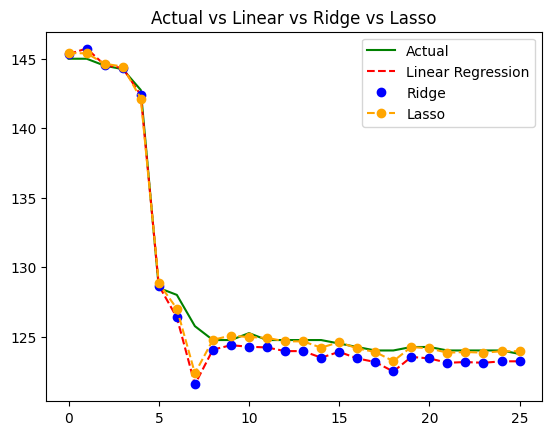

In [91]:
plt.plot(compare_df['Actual'], color='green')
plt.plot(compare_df['Linear'], '--', color='red')
plt.plot(compare_df['Ridge'], 'o', color='blue')
plt.plot(compare_df['Lasso'],  '--o' ,color='orange')
plt.yscale('linear')
plt.title('Actual vs Linear vs Ridge vs Lasso')
plt.legend(['Actual', 'Linear Regression', 'Ridge', 'Lasso'])
plt.show()

In [98]:
# Create a new DataFrame for Plotly Express
compare_df_plotly = compare_df.reset_index()
compare_df_plotly.rename(columns={'index': 'Date'}, inplace=True)

# Plot using Plotly Express
fig = px.line(compare_df_plotly,
              x='Date',
              y=['Actual', 'Linear', 'Ridge', 'Lasso'],
              title='Actual vs Linear vs Ridge vs Lasso',
              labels={'value': 'Value', 'Date': 'Date'},
              markers=True)

# Customize the line style
fig.update_traces(
    line=dict(dash='solid'),
    selector=dict(name="Actual")
)
fig.update_traces(
    line=dict(dash='dash'),
    selector=dict(name="Linear")
)
fig.update_traces(
    line=dict(dash='solid'),
    marker=dict(symbol='circle'),
    selector=dict(name="Ridge")
)
fig.update_traces(
    line=dict(dash='dash'),
    marker=dict(symbol='circle'),
    selector=dict(name="Lasso")
)

# Show the plot
fig.show()


In [55]:
# Check the ranges of your features and target variable
print("Feature Ranges:")
for col in features:
    print(f"{col}: {df2[col].min()} - {df2[col].max()}")

print(f"Target Variable Range: {df2[target_variable].min()} - {df2[target_variable].max()}")

# Check model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linreg.coef_.reshape(-1,)})
print(coefficients)

Feature Ranges:
12m High: 148.75 - 148.75
12m Low: 121 - 123
Day Low: 121 - 145
Day High: 124 - 148.75
Target Variable Range: 123.75 - 146.25
    Feature  Coefficient
0  12m High     0.000000
1   12m Low     0.166965
2   Day Low     4.189495
3  Day High     1.064281
